In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
import math
import statistics
import operator
import matplotlib.pyplot as plt
import traitlets
from IPython.display import display
from ipywidgets import widgets
from tkinter import Tk, filedialog


class SelectFilesButton(widgets.Button):
    """A file widget that leverages tkinter.filedialog."""

    def __init__(self, *args, **kwargs):
        """Initialize the SelectFilesButton class."""
        super(SelectFilesButton, self).__init__(*args, **kwargs)
        # Add the selected_files trait
        self.add_traits(files=traitlets.traitlets.List())
        # Create the button.
        self.description = "Select Files"
        self.icon = "square-o"
        self.style.button_color = "orange"
        # Set on click behavior.
        self.on_click(self.select_files)

    @staticmethod
    def select_files(b):
        """Generate instance of tkinter.filedialog.
        Parameters
        ----------
        b : obj:
            An instance of ipywidgets.widgets.Button
        """
        # Create Tk root
        root = Tk()
        # Hide the main window
        root.withdraw()
        # Raise the root to the top of all windows.
        root.call('wm', 'attributes', '.', '-topmost', True)
        # List of selected fileswill be set to b.value
        b.files = filedialog.askopenfilename(multiple=True)

        b.description = "Files Selected"
        b.icon = "check-square-o"
        b.style.button_color = "lightgreen"
my_button_1 = SelectFilesButton()
my_button_1


SelectFilesButton(description='Select Files', icon='square-o', style=ButtonStyle(button_color='orange'))

In [19]:
main_dict = pd.read_csv(my_button_1.files[0]).loc[ : , ["Input.text","top_label", "second_label", "is_stressor"]]
#Remerging labels together since a lot of this code seems to depend on it
#I removed this cleanup because it is handled by the other workbookd (MLM)
main_dict['Answer.Label'] = ""
for i, row in main_dict.iterrows():
    if row['second_label'] == " ":
        main_dict.at[i,'Answer.Label'] = row['top_label']
    main_dict.at[i,'Answer.Label'] = row['top_label'] + "|" + row['second_label'] # instead of an 'else' it must do it each time

In [20]:
main_dict[:5]

,Input.text,top_label,second_label,is_stressor,Answer.Label
0,this bumper to bumper traffic is driving me nu...,Everyday Decision Making,Other,1,Everyday Decision Making|Other
1,driving 2 work really sucks,Work,Other,1,Work|Other
2,planning and decide on a common location for o...,Other,Social Relationships,0,Other|Social Relationships
3,i have been very stressed out by all the bad d...,Other,Everyday Decision Making,1,Other|Everyday Decision Making
4,i've been having car problems lately and worri...,Financial Problem,Other,1,Financial Problem|Other


In [21]:
counts_dictionary = {}
for label in main_dict['Answer.Label'].tolist():
    if '|' in label:
        if label not in counts_dictionary:
            counts_dictionary[label] = 0
        counts_dictionary[label] += 1

In [6]:
counts_dictionary

{'Everyday Decision Making|Other': 60,
 'Work|Other': 85,
 'Other|Social Relationships': 35,
 'Other|Everyday Decision Making': 92,
 'Financial Problem|Other': 39,
 'Other|Emotional Turmoil': 41,
 'Health, Fatigue, or Physical Pain|Everyday Decision Making': 16,
 'Financial Problem|Everyday Decision Making': 26,
 'Other|Financial Problem': 24,
 'Other|Health, Fatigue, or Physical Pain': 13,
 'Emotional Turmoil|Social Relationships': 20,
 'Family Issues|Other': 33,
 'Other|School': 4,
 'Other|Work': 31,
 'Everyday Decision Making|Work': 9,
 'Social Relationships|Family Issues': 21,
 'Work|Family Issues': 28,
 'Other|Family Issues': 13,
 'Social Relationships|Everyday Decision Making': 6,
 'Family Issues|Emotional Turmoil': 48,
 'School|Emotional Turmoil': 28,
 'Financial Problem|School': 9,
 'Emotional Turmoil|Other': 22,
 'Financial Problem|Work': 74,
 'Everyday Decision Making|Health, Fatigue, or Physical Pain': 3,
 'Everyday Decision Making|Emotional Turmoil': 13,
 'Everyday Decision

In [55]:
ordered_tuples = []
seen = []
flag = False
for label in counts_dictionary:
    label_main, label_sec = label.split('|')
    temporary_dict = {}
    for label_want in counts_dictionary:
        first, second = label_want.split('|')
        if (label_main == first) and (label_want not in seen):
            seen.append(label_want)
            temporary_dict[label_want] = counts_dictionary[label_want]
    dict_tuples = sorted([item for item in temporary_dict.items()], key=lambda item: item[1], reverse=True)
    ordered_tuples.extend(dict_tuples)
sortednew_dict = {}
for pair in ordered_tuples:
    sortednew_dict[pair[0]] = pair[1]
revised_dict = {'stressor': [], 'count': []}
for label in sortednew_dict:
    label1, label2 = label.split('|')
    label_fixed = label2 + '|' + label1
    revised_dict['stressor'].append(label_fixed)
    revised_dict['count'].append(counts_dictionary[label])

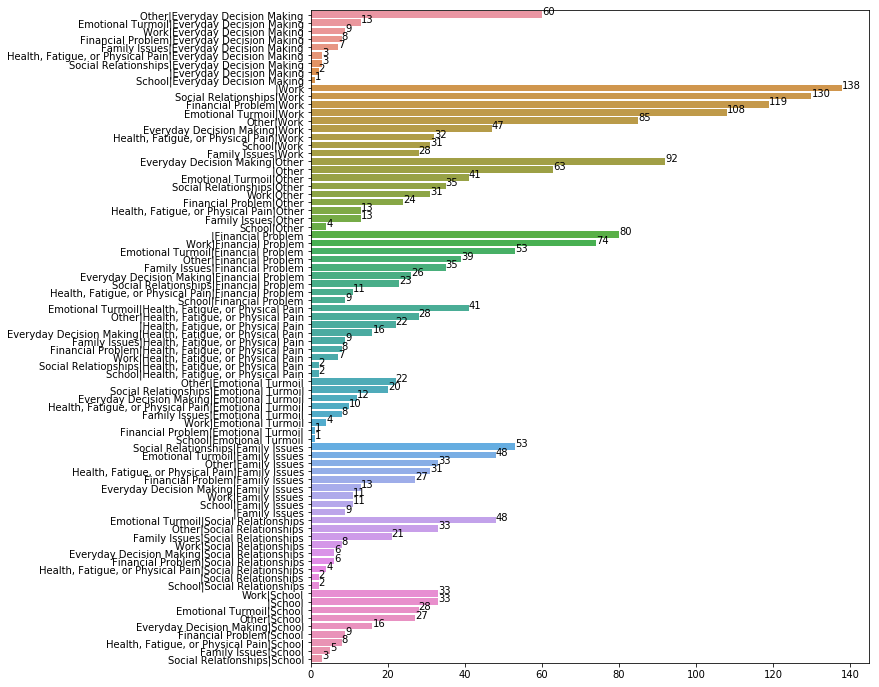

In [56]:
values = revised_dict['count']
plt.subplots(figsize = (10,12))
sns.barplot(x='count', y='stressor', data=revised_dict)
for index, value in enumerate(values):
        plt.text(value, index, str(value))

In [24]:
list_labels = []
temp_list = []
for i in range(1, len(main_dict['Answer.Label'].tolist())):
    temp_list.append(main_dict['Answer.Label'].tolist()[i])
    if i % 5 == 0:
        list_labels.append(temp_list)
        temp_list=[]

In [44]:
count_sing_dict = {}
for label in main_dict['top_label']:
    if label not in count_sing_dict:
        count_sing_dict[label] = 0
    count_sing_dict[label] += 1

In [45]:
count_sing_dict

{'Everyday Decision Making': 106,
 'Work': 718,
 'Other': 316,
 'Financial Problem': 350,
 'Health, Fatigue, or Physical Pain': 135,
 'Emotional Turmoil': 78,
 'Family Issues': 236,
 'Social Relationships': 130,
 'School': 162}

In [47]:
sorted_diction = sorted([item for item in count_sing_dict.items()], key=lambda item: item[1], reverse=True)

In [57]:
for label in sorted_diction:
    revised_dict['stressor'].append(label[0])
    revised_dict['count'].append(label[1])

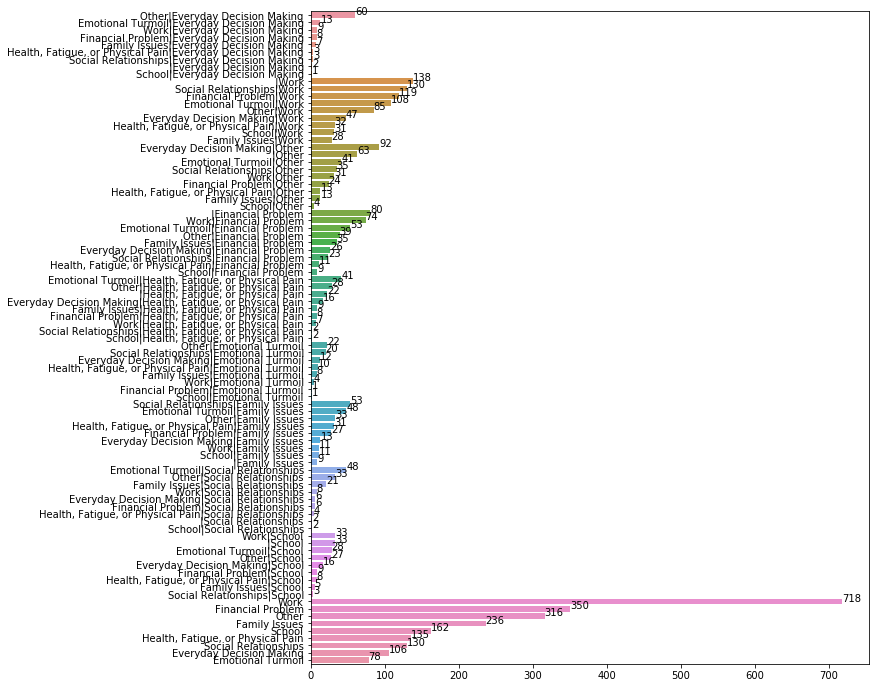

In [58]:
values = revised_dict['count']
plt.subplots(figsize = (10,12))
sns.barplot(x='count', y='stressor', data=revised_dict)
for index, value in enumerate(values):
        plt.text(value, index, str(value))

In [60]:
def plot_ready(want, sorted_diction):
    mini_dict = pull_out_dict_mini(counts_dictionary, str(want))
    mini_dict = sort_dict(mini_dict)
    mini_dict = combine_main_mini(sorted_diction, mini_dict, want)
    return mini_dict

In [61]:
def pull_out_dict_mini(dictionary, want):
    grouped_dict = {}
    for key in dictionary:
        first, second = key.split('|')
        if want == first:
            grouped_dict[key] = dictionary[key]
    return grouped_dict

In [62]:
def sort_dict(unsorted_dictionary):
    sorted_dict = {'stressor': [], 'count': []}
    sorted_list = sorted([item for item in unsorted_dictionary.items()], key=lambda item: item[1], reverse=True)
    for label in sorted_list:
        label1, label2 = label[0].split('|')
        label_changed = label2 + '|' + label1
        sorted_dict['stressor'].append(label_changed)
        sorted_dict['count'].append(label[1])
    return sorted_dict

In [63]:
def combine_main_mini(single_set, mini_set, want):
    for label in single_set:
        if label[0] == want:
            mini_set['stressor'].append(label[0])
            mini_set['count'].append(label[1])
    return mini_set

In [64]:
other_mini = plot_ready('Other',sorted_diction)
work_mini = plot_ready('Work', sorted_diction)
social_mini = plot_ready('Social Relationships', sorted_diction)
everyday_mini = plot_ready('Everyday Decision Making', sorted_diction)
fin_mini = plot_ready('Financial Problem', sorted_diction)
emotion_mini = plot_ready('Emotional Turmoil', sorted_diction)
school_mini = plot_ready('School', sorted_diction)
fam_mini = plot_ready('Family Issues', sorted_diction)
health_mini = plot_ready('Health, Fatigue, or Physical Pain', sorted_diction)

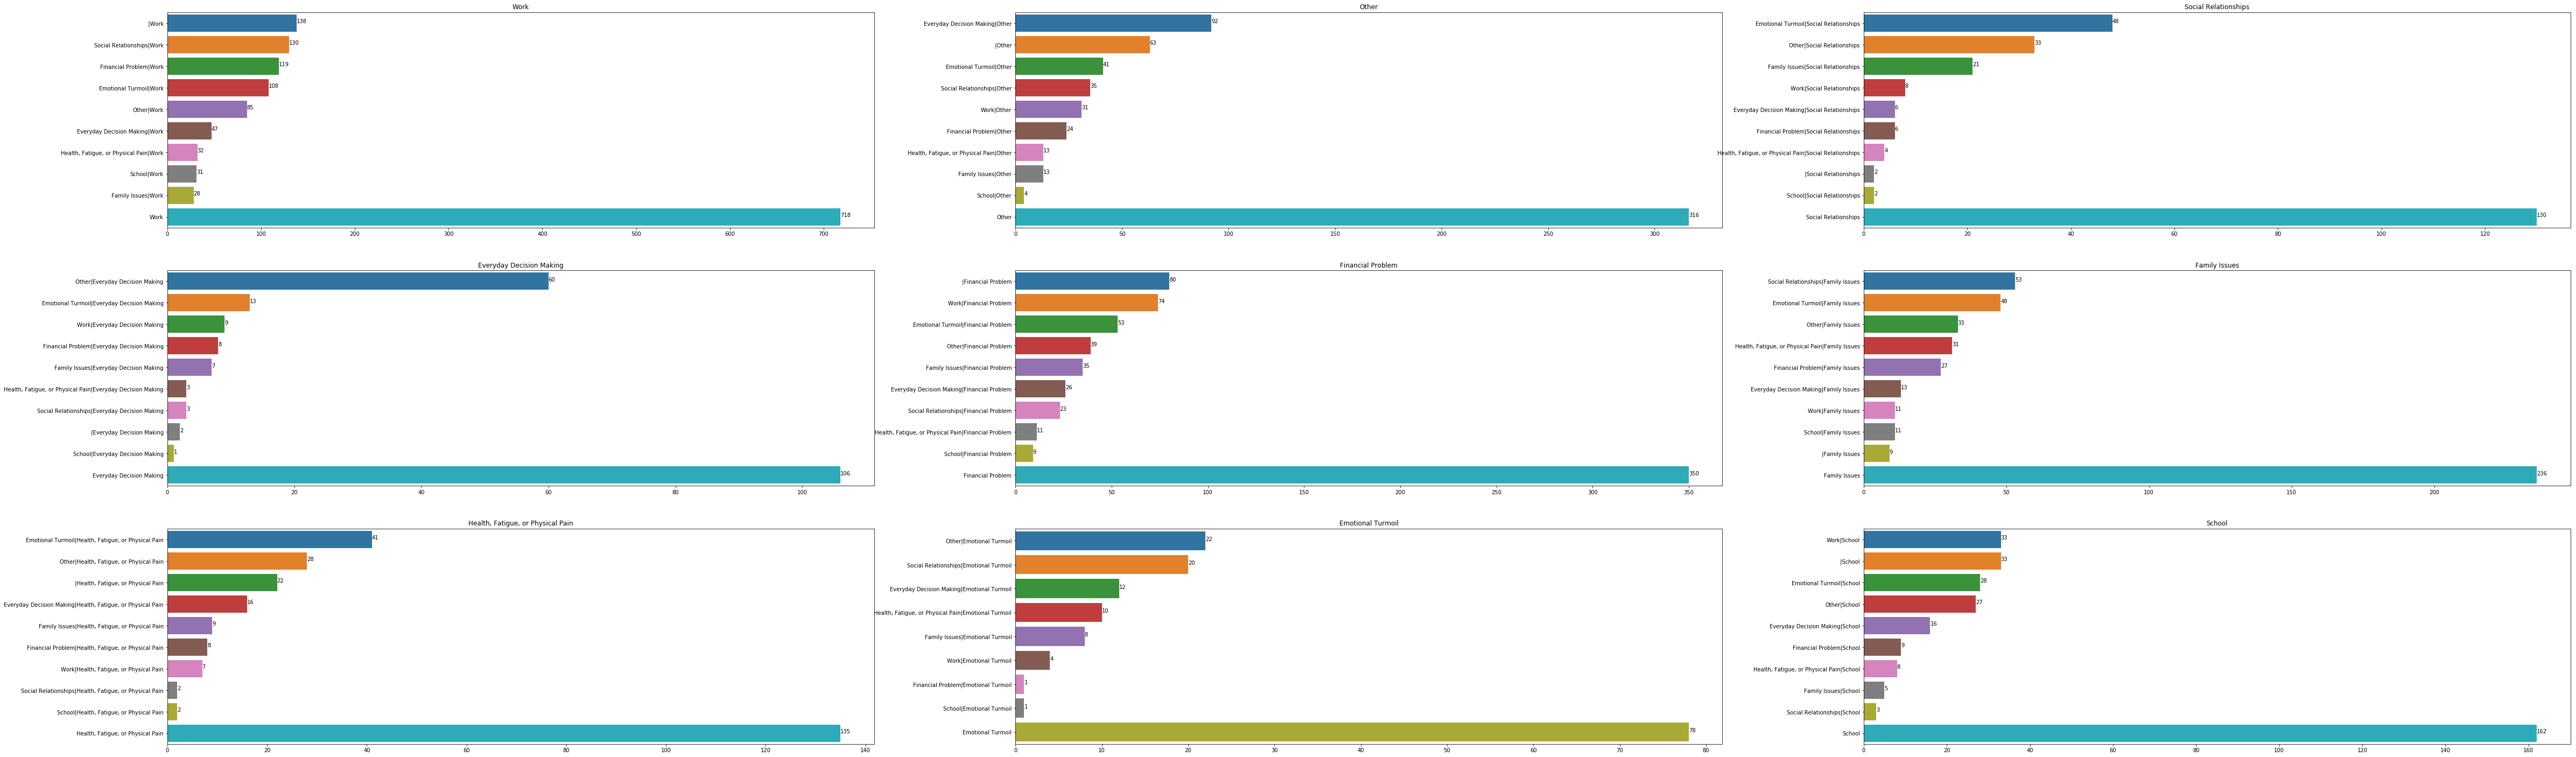

In [65]:
plt.subplots(figsize=(80, 25))
plt.subplot(3, 3, 1)
values = work_mini['count']
sns.barplot(x='count', y='stressor', data=work_mini)
plt.title('Work')
for index, value in enumerate(values):
        plt.text(value, index, str(value))

plt.subplot(3, 3, 2)
values = other_mini['count']
sns.barplot(x='count', y='stressor', data=other_mini)
plt.title('Other')
for index, value in enumerate(values):
        plt.text(value, index, str(value))
        
plt.subplot(3, 3, 3)
values = social_mini['count']
plt.title('Social Relationships')
sns.barplot(x='count', y='stressor', data=social_mini)
for index, value in enumerate(values):
        plt.text(value, index, str(value))
        
plt.subplot(3, 3, 4)
values = everyday_mini['count']
plt.title('Everyday Decision Making')
sns.barplot(x='count', y='stressor', data=everyday_mini)
for index, value in enumerate(values):
        plt.text(value, index, str(value))
        
plt.subplot(3, 3, 5)
values = fin_mini['count']
plt.title('Financial Problem')
sns.barplot(x='count', y='stressor', data=fin_mini)
for index, value in enumerate(values):
        plt.text(value, index, str(value))
        
plt.subplot(3, 3, 6)
values = fam_mini['count']
plt.title('Family Issues')
sns.barplot(x='count', y='stressor', data=fam_mini)
for index, value in enumerate(values):
        plt.text(value, index, str(value))
        
plt.subplot(3, 3, 7)
values = health_mini['count']
plt.title('Health, Fatigue, or Physical Pain')
sns.barplot(x='count', y='stressor', data=health_mini)
for index, value in enumerate(values):
        plt.text(value, index, str(value))

plt.subplot(3, 3, 8)
values = emotion_mini['count']
plt.title('Emotional Turmoil')
sns.barplot(x='count', y='stressor', data=emotion_mini)
for index, value in enumerate(values):
        plt.text(value, index, str(value))
    
plt.subplot(3, 3, 9)
values = school_mini['count']
plt.title('School')
sns.barplot(x='count', y='stressor', data=school_mini)
for index, value in enumerate(values):
        plt.text(value, index, str(value))
plt.savefig('testimag.png', bbox_inches='tight')